In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error


In [38]:
from google.colab import files

data = files.upload()

Saving DATASET - Sheet1.csv to DATASET - Sheet1 (1).csv


In [43]:
# Convert the dictionary to DataFrame
data = pd.read_csv('DATASET - Sheet1.csv') # Assuming your file is named 'DATASET - Sheet1 (1).csv'
data

,CROP TYPE,SOIL TYPE,REGION,TEMPERATURE,WEATHER CONDITION,WATER REQUIREMENT
0,BANANA,DRY,DESERT,10-20,NORMAL,8.750
1,BANANA,DRY,DESERT,10-20,SUNNY,10.250
2,BANANA,DRY,DESERT,10-20,WINDY,9.650
3,BANANA,DRY,DESERT,10-20,RAINY,0.750
4,BANANA,DRY,DESERT,20-30,NORMAL,9.850
...,...,...,...,...,...,...
2875,ONION,WET,HUMID,30-40,RAINY,0.100
2876,ONION,WET,HUMID,40-50,NORMAL,4.625
2877,ONION,WET,HUMID,40-50,SUNNY,6.125
2878,ONION,WET,HUMID,40-50,WINDY,5.625


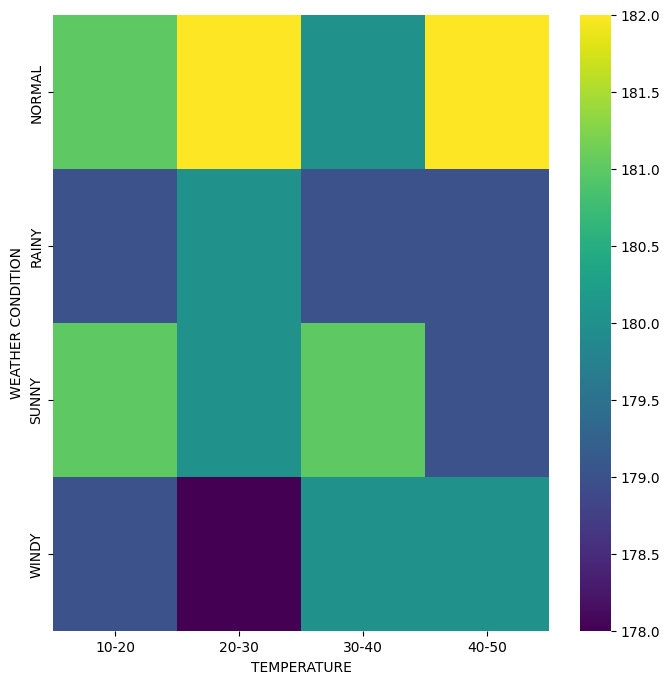

In [47]:
#  TEMPERATURE vs WEATHER CONDITION


plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['WEATHER CONDITION'].value_counts()
    for x_label, grp in data.groupby('TEMPERATURE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('TEMPERATURE')
_ = plt.ylabel('WEATHER CONDITION')

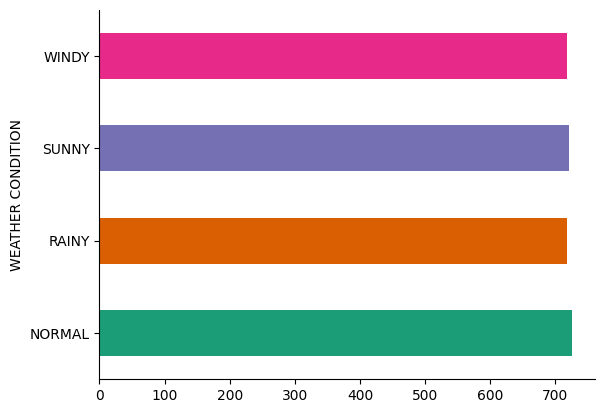

In [45]:
#  WEATHER CONDITION


data.groupby('WEATHER CONDITION').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [48]:
# Split the dataset into features and target
X = data.drop(columns=['WATER REQUIREMENT'])
y = data['WATER REQUIREMENT']

In [49]:
# Identify categorical columns
categorical_cols = ['CROP TYPE', 'SOIL TYPE', 'REGION', 'TEMPERATURE', 'WEATHER CONDITION']

In [50]:
# Preprocessing: OneHotEncoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


In [51]:
# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [52]:
# Create a pipeline that combines the preprocessing and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

In [53]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CROP TYPE', 'SOIL TYPE',
                                                   'REGION', 'TEMPERATURE',
                                                   'WEATHER CONDITION'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [56]:
# Predict and evaluate the model
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 1.0646269965277773


In [57]:
# Step 9: Future predictions for different crops
new_data = pd.DataFrame({
    'CROP TYPE': ['BANANA', 'WHEAT', 'RICE', 'CORN', 'POTATO'],
    'SOIL TYPE': ['DRY', 'CLAY', 'LOAMY', 'SANDY', 'SILT'],
    'REGION': ['DESERT', 'PLAINS', 'HILLS', 'COASTAL', 'PLATEAU'],
    'TEMPERATURE': ['20-30', '10-20', '30-40', '20-30', '10-20'],
    'WEATHER CONDITION': ['SUNNY', 'WINDY', 'RAINY', 'NORMAL', 'CLOUDY']
})


In [58]:
# Predict water requirement for new data
future_predictions = pipeline.predict(new_data)
print(f'Predicted Water Requirement: {future_predictions}')

Predicted Water Requirement: [10.9352  6.7161  3.579   4.5584  5.9019]


In [59]:
# Add the predictions to the new data DataFrame for better visualization
new_data['Predicted Water Requirement'] = future_predictions

In [60]:
# Display the predictions
print(new_data)

  CROP TYPE SOIL TYPE   REGION TEMPERATURE WEATHER CONDITION  \
0    BANANA       DRY   DESERT       20-30             SUNNY   
1     WHEAT      CLAY   PLAINS       10-20             WINDY   
2      RICE     LOAMY    HILLS       30-40             RAINY   
3      CORN     SANDY  COASTAL       20-30            NORMAL   
4    POTATO      SILT  PLATEAU       10-20            CLOUDY   

   Predicted Water Requirement  
0                      10.9352  
1                       6.7161  
2                       3.5790  
3                       4.5584  
4                       5.9019  
